In [71]:
import pandas as pd
from keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data = pd.read_csv("data.csv", header=None)

In [43]:
data = data.sample(frac=1).reset_index(drop=True)

In [44]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [45]:
X = data.iloc[:, : 30]
y = data.iloc[:, 30]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [60]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_shape=(30,)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [61]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss="binary_crossentropy",
    metrics=['acc']
)

In [62]:
history = model.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_val, y_val))

Train on 4105 samples, validate on 1027 samples
Epoch 1/20
4105/4105 [==============================] - 1s 167us/step - loss: 0.1520 - acc: 0.9527 - val_loss: 0.0289 - val_acc: 0.9942
Epoch 2/20
4105/4105 [==============================] - 0s 113us/step - loss: 0.0277 - acc: 0.9934 - val_loss: 0.0178 - val_acc: 0.9951
Epoch 3/20
4105/4105 [==============================] - 0s 113us/step - loss: 0.0217 - acc: 0.9946 - val_loss: 0.0137 - val_acc: 0.9951
Epoch 4/20
4105/4105 [==============================] - 0s 119us/step - loss: 0.0217 - acc: 0.9944 - val_loss: 0.0095 - val_acc: 0.9981
Epoch 5/20
4105/4105 [==============================] - 1s 128us/step - loss: 0.0216 - acc: 0.9942 - val_loss: 0.0065 - val_acc: 0.9981
Epoch 6/20
4105/4105 [==============================] - 0s 118us/step - loss: 0.0185 - acc: 0.9951 - val_loss: 0.0050 - val_acc: 0.9981
Epoch 7/20
4105/4105 [==============================] - 0s 111us/step - loss: 0.0203 - acc: 0.9942 - val_loss: 0.0059 - val_acc: 0.9971


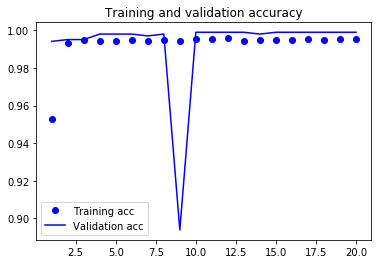

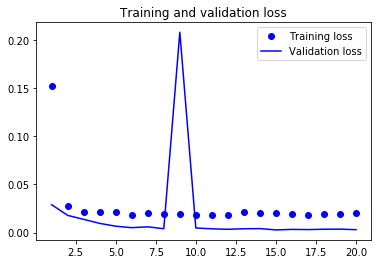

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [64]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1284/1284 [==============================] - 0s 48us/step


In [66]:
y_pred = model.predict(X_test)

In [75]:
y_pred = np.round(y_pred)

In [80]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))    
print("F1 Score: ", f1_score(y_test, y_pred))
print("Accuracy: ", test_acc)

Precision:  0.9861111111111112
Recall:  1.0
F1 Score:  0.993006993006993
Accuracy:  0.9968847352024922
